In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Read data into a dataframe and clean the data.

In [2]:
databel_df = pd.read_csv(r'C:\Users\john_\projects\CUSTOMER_CHURN\csv_files\Databel - Data.csv')
databel_df.shape

(6687, 29)

In [3]:
pd.set_option('display.max_columns', 35)
databel_df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Unlimited Data Plan,Extra Data Charges,State,Phone Number,Gender,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,0,3,Yes,0,KS,382-4657,Female,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,0,3,Yes,0,OH,371-7191,Male,49,No,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,3,Yes,0,OH,375-9999,Male,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,2,Yes,0,MO,329-9001,Female,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,3,Yes,0,WV,330-8173,Male,51,No,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [4]:
databel_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account Length (in months),6687.0,32.337820,24.595689,1.0,9.0,29.0,55.00,77.0
Local Calls,6687.0,130.974129,121.893966,1.0,31.0,98.0,199.00,918.0
Local Mins,6687.0,322.752864,288.619931,4.0,76.9,250.5,498.05,1234.2
Intl Calls,6687.0,51.097524,103.592369,0.0,0.0,0.0,52.00,1120.0
Intl Mins,6687.0,130.070624,243.527828,0.0,0.0,0.0,140.40,1372.5
Extra International Charges,6687.0,33.641783,76.346828,0.0,0.0,0.0,16.40,585.8
Customer Service Calls,6687.0,0.915657,1.411484,0.0,0.0,0.0,2.00,5.0
Avg Monthly GB Download,6687.0,6.696276,7.454339,0.0,1.0,5.0,9.00,43.0
Extra Data Charges,6687.0,3.374458,12.565309,0.0,0.0,0.0,0.00,99.0
Age,6687.0,47.448632,16.969893,19.0,33.0,47.0,60.00,85.0


In [5]:
databel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

* Most categorical columns with a *Yes* or *No* answer are capitalized, lets capitalize the answers for the *Intl Plan* column to keep it consistent.

In [6]:
databel_df['Intl Plan'] = [var.capitalize() for var in databel_df['Intl Plan']]

* The only two columns with nulls are 'Churn Category' and 'Churn Reason'. Lets see if we can find a reason for that.

In [7]:
databel_df.groupby('Churn Label')[['Churn Category', 'Churn Reason']].count()

,Churn Category,Churn Reason
Churn Label,,
No,0,0
Yes,1769,1769


In [8]:
print(f"Unique Churn Categories for current customers: {databel_df[databel_df['Churn Label'] == 'No']['Churn Category'].unique()}")
print(f"Unique Churn Reasons for current customers:    {databel_df[databel_df['Churn Label'] == 'No']['Churn Reason'].unique()}\n")

print(f"Unique Churn Categories for churned customers: {databel_df[databel_df['Churn Label'] == 'Yes']['Churn Category'].unique()}")
print(f"Unique Churn Reasons for churned customers:    {databel_df[databel_df['Churn Label'] == 'Yes']['Churn Reason'].unique()}")

Unique Churn Categories for current customers: [nan]
Unique Churn Reasons for current customers:    [nan]

Unique Churn Categories for churned customers: [nan 'Competitor' 'Other' 'Attitude' 'Dissatisfaction' 'Price']
Unique Churn Reasons for churned customers:    [nan 'Competitor made better offer' 'Moved'
 'Competitor had better devices'
 'Competitor offered higher download speeds' 'Attitude of support person'
 'Network reliability' "Don't know" 'Service dissatisfaction'
 'Product dissatisfaction' 'Poor expertise of online support'
 'Price too high' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Competitor offered more data' 'Attitude of service provider'
 'Poor expertise of phone support' 'Extra data charges' 'Deceased'
 'Lack of self-service on Website']


* Nulls are found for customers that are still with the company, which makes sense.
* There are some Nulls found for customers that have already churned, lets assume that the customer simply didn't provide any information on why they left. Lets fill those Nulls with *Other* for the *Churn Category* and *Don't know* for *Churn Reason*.

In [9]:
fill_na_dict = {'Churn Category': 'Other', 'Churn Reason': 'Don\'t know'}
databel_df[
    (databel_df['Churn Label'] == 'Yes') & (databel_df['Churn Category'].isna())
] = databel_df[
    (databel_df['Churn Label'] == 'Yes') & (databel_df['Churn Category'].isna())
].fillna(value=fill_na_dict)

* The *Senior* and *Under 30* columns may work better if they were combine into one column.

In [10]:
databel_df.insert(loc=18,
                  column='Age Category',
                  value=np.where((databel_df['Under 30'] == 'Yes') & (databel_df['Senior'] == 'No'), 'Under 30',
                   np.where((databel_df['Under 30'] == 'No') & (databel_df['Senior'] == 'Yes'), 'Senior', 'In between')))

databel_df.drop(columns=['Under 30', 'Senior'], inplace=True)

* It seems that the *Intl Calls* column has decimal numbers, which doesn't make sense.
* Lets truncate those decimals to whole numbers and change the data type to ints.

In [11]:
[np.trunc(val) for val in databel_df['Intl Calls']]
databel_df['Intl Calls'] = databel_df['Intl Calls'].astype('int64')

In [12]:
databel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   int64  
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

### This looks good, onto the EDA!

## Exploratory Data Analysis

### Lets find the overall churn rate.

In [13]:
churned_groups = list(databel_df.groupby('Churn Label')['Churn Label'].value_counts())
churn_rate = (churned_groups[1] / (churned_groups[0] + churned_groups[1])) * 100
print('Churn Rate: ' + str(round(churn_rate, 2)) + '%')

Churn Rate: 26.86%


### Since we're going to look at the churned customers a lot, lets subset a dataframe for churned customers, as well as one for current customers for later use.

In [14]:
# Churned customers dataframe
churned_df = databel_df[databel_df['Churn Label'] == 'Yes']

# Current customers dataframe
current_df = databel_df[databel_df['Churn Label'] == 'No']

## Demographics

### Lets explore the ages of current customers and customers that have already churned.

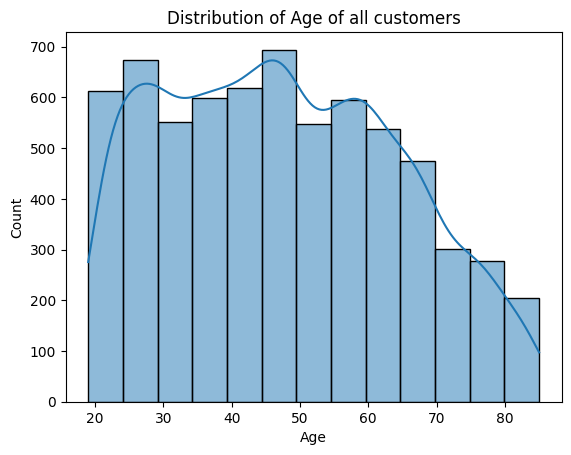

In [15]:
sns.histplot(databel_df['Age'], binwidth=5, kde=True)
plt.title('Distribution of Age of all customers')
plt.show()

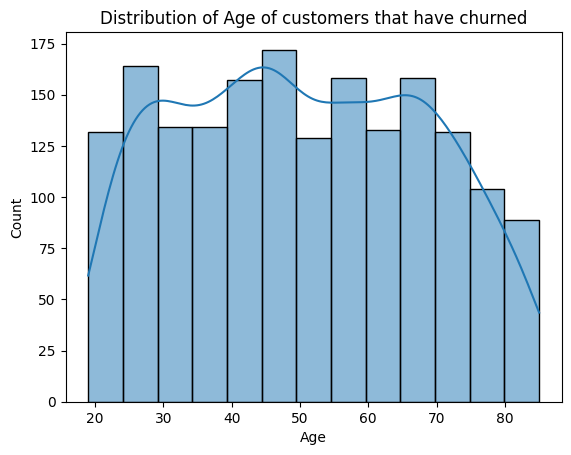

In [16]:
sns.histplot(churned_df['Age'], binwidth=5, kde=True)
plt.title('Distribution of Age of customers that have churned')
plt.show()

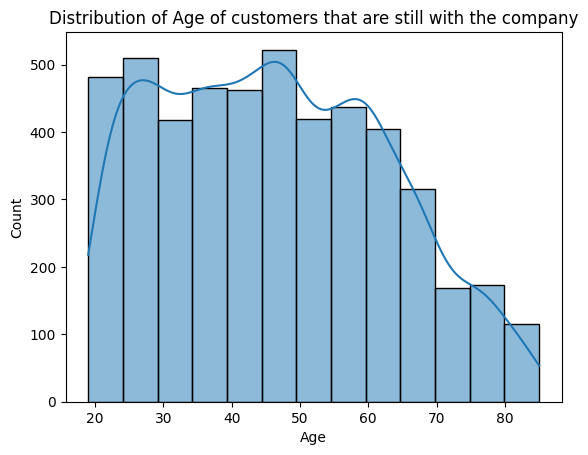

In [17]:
sns.histplot(current_df['Age'], binwidth=5, kde=True)
plt.title('Distribution of Age of customers that are still with the company')
plt.show()

In [18]:
churned_df['Age Category'].value_counts()

Age Category
In between    1017
Senior         483
Under 30       296
Name: count, dtype: int64

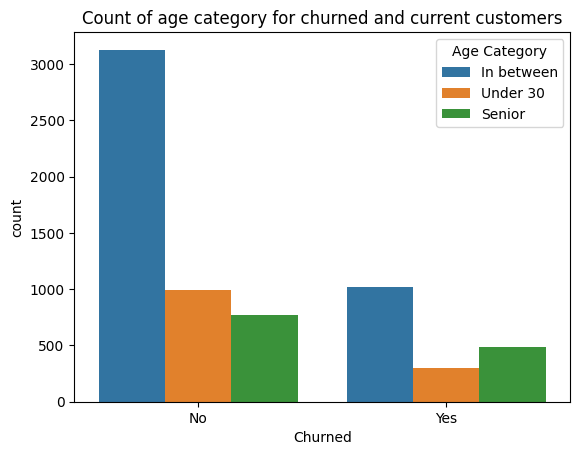

In [19]:
sns.countplot(data=databel_df,
              x='Churn Label',
              hue='Age Category')

plt.title('Count of age category for churned and current customers')
plt.legend(title='Age Category')
plt.xlabel('Churned')
plt.show()

### Lets take a look at churns for each gender.

In [20]:
churned_df['Gender'].value_counts()

Gender
Male                 897
Female               897
Prefer not to say      2
Name: count, dtype: int64

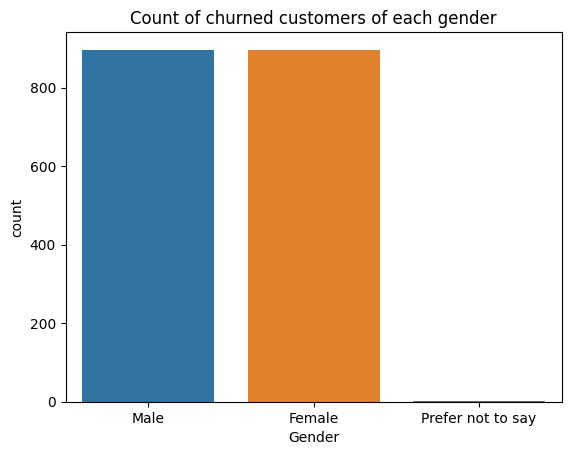

In [21]:
sns.countplot(data=churned_df,
              x='Gender',
              hue='Gender')

plt.title('Count of churned customers of each gender')
plt.show()

### Lets see if any customer's location has many more churns than most.

In [22]:
state_churned_counts = churned_df['State'].value_counts()
print(state_churned_counts.sort_values(ascending=False))

State
WV    57
OH    55
OR    48
MD    46
AL    46
MT    43
CA    43
IN    42
TX    42
VA    42
ID    41
MI    40
NE    40
VT    39
WI    39
NY    39
MN    38
WY    38
CT    38
NJ    37
MS    37
DE    37
UT    36
KS    36
MO    36
NH    36
SC    36
KY    36
NV    36
IL    33
RI    33
MA    33
ND    31
PA    30
AK    30
AZ    30
NM    30
WA    29
ME    29
CO    29
HI    28
NC    28
SD    27
AR    27
FL    27
LA    25
GA    25
OK    24
IA    24
TN    24
DC    21
Name: count, dtype: int64


### Now lets see about churn rate for each location.

In [23]:
state_total_counts = databel_df['State'].value_counts()
state_churn_rate = round((state_churned_counts.sort_index(ascending=True) / state_total_counts.sort_index(ascending=True)) * 100, 2)
print(state_churn_rate)

State
AK    28.85
AL    28.57
AR    24.55
AZ    23.44
CA    63.24
CO    21.97
CT    25.68
DC    19.44
DE    30.33
FL    21.26
GA    23.15
HI    26.42
IA    26.67
ID    27.89
IL    28.45
IN    29.37
KS    25.53
KY    30.51
LA    24.27
MA    25.19
MD    32.86
ME    23.39
MI    27.40
MN    22.62
MO    28.35
MS    28.46
MT    31.39
NC    20.59
ND    25.00
NE    32.79
NH    32.14
NJ    27.01
NM    24.19
NV    27.27
NY    23.35
OH    34.81
OK    19.51
OR    30.77
PA    33.33
RI    25.19
SC    30.00
SD    22.50
TN    22.64
TX    28.97
UT    25.00
VA    27.10
VT    26.53
WA    21.97
WI    25.00
WV    26.76
WY    24.68
Name: count, dtype: float64


In [24]:
print(f"Average of state churn rate: {round(np.mean(state_churn_rate), 2)}")
print(f"Median of state churn rate:  {round(np.median(state_churn_rate), 2)}")
print(f"Maximum value of state churn rate: {np.max(state_churn_rate)}")
print(f"Minimum value of state churn rate: {np.min(state_churn_rate)}")

Average of state churn rate: 27.18
Median of state churn rate:  26.53
Maximum value of state churn rate: 63.24
Minimum value of state churn rate: 19.44


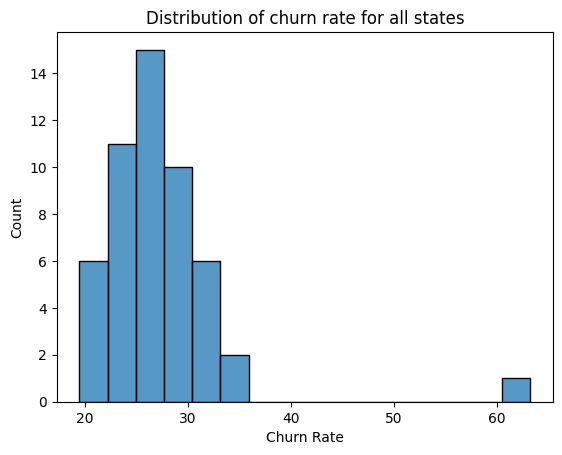

In [25]:
sns.histplot(data=state_churn_rate)
plt.xlabel('Churn Rate')
plt.title('Distribution of churn rate for all states')
plt.show()

In [26]:
# Lets find which state is the outlier, having the highest churn rate.
state_churn_dict = {}
states = np.array(state_churn_rate.index)
state_churn_rates_arr = np.array(state_churn_rate)
for i in range(0, len(states)):
    state_churn_dict[states[i]] = state_churn_rates_arr[i]
    
max_val = 0
max_state = ''
for k, v in state_churn_dict.items():
    if max_val < v:
        max_val = v
        max_state = k

print(f"State with highest churn rate: {max_state}\nChurn rate: {max_val}")

State with highest churn rate: CA
Churn rate: 63.24


In [27]:
state_total_counts.sort_values(ascending=True)

State
CA     68
IA     90
PA     90
LA    103
AK    104
HI    106
TN    106
DC    108
GA    108
AR    110
NH    112
IL    116
KY    118
SD    120
SC    120
NE    122
DE    122
OK    123
ME    124
ND    124
NM    124
FL    127
MO    127
AZ    128
MS    130
RI    131
MA    131
CO    132
WA    132
NV    132
NC    136
NJ    137
MT    137
MD    140
KS    141
IN    143
UT    144
TX    145
MI    146
VT    147
ID    147
CT    148
WY    154
VA    155
OR    156
WI    156
OH    158
AL    161
NY    167
MN    168
WV    213
Name: count, dtype: int64

## Contracts, Plans, Local and International calling

### Lets find how long a customer will usually stick around until they churn.

In [28]:
print(f"Account length mean: {np.mean(churned_df['Account Length (in months)'])}")
print(f"Account length median: {np.median(churned_df['Account Length (in months)'])}")
print(f"Account length max: {max(churned_df['Account Length (in months)'])}")
print(f"Account length min: {min(churned_df['Account Length (in months)'])}")

Account length mean: 18.071269487750556
Account length median: 10.0
Account length max: 74
Account length min: 1


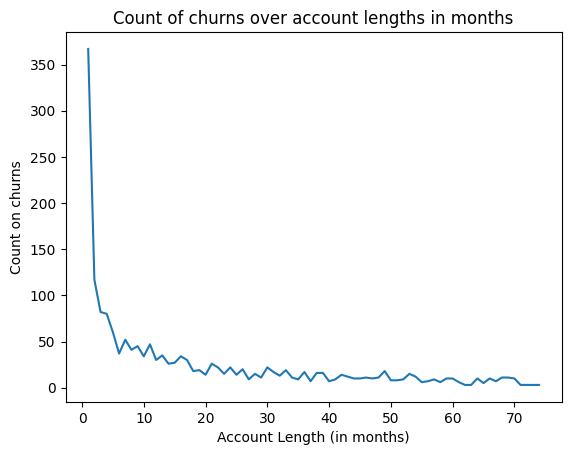

In [29]:
account_len_counts = churned_df['Account Length (in months)'].value_counts()
sns.lineplot(x=account_len_counts.index,
             y=account_len_counts.values,
             errorbar=None)
plt.title('Count of churns over account lengths in months')
plt.ylabel('Count on churns')
plt.show()

In [30]:
# Lets find the percentage churns that occur in the first month.
round((account_len_counts[1] / np.sum(account_len_counts)) * 100, 2)

20.43

### Lets examine the different types of contracts that churned customers had(monthly and yearly contracts).

In [31]:
contract_groupby = databel_df.groupby('Churn Label')['Contract Type'].value_counts()
print(contract_groupby.sort_index())

Churn Label  Contract Type 
No           Month-to-Month    1832
             One Year          1312
             Two Year          1747
Yes          Month-to-Month    1579
             One Year           167
             Two Year            50
Name: count, dtype: int64


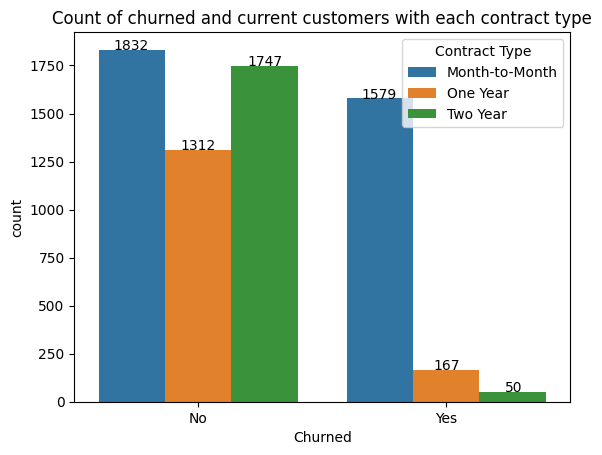

In [32]:
sns.countplot(data=databel_df,
              x='Churn Label',
              hue='Contract Type')

bar_locations = [-0.27, 0, 0.27, 0.73, 1, 1.27]
bar_iter = iter(bar_locations)

for index, row in enumerate(contract_groupby.sort_index()):
    plt.text(next(bar_iter), y=row, s= str(row), color='black', ha='center')

plt.title('Count of churned and current customers with each contract type')
plt.legend(title='Contract Type')
plt.xlabel('Churned')
plt.show()

In [33]:
# Lets see the group by in percentage. The percentages are by all customers.
round((contract_groupby / contract_groupby.sum()) * 100, 2)

Churn Label  Contract Type 
No           Month-to-Month    27.40
             Two Year          26.13
             One Year          19.62
Yes          Month-to-Month    23.61
             One Year           2.50
             Two Year           0.75
Name: count, dtype: float64

In [34]:
print('Percentages for current customers')
print(round((current_df['Contract Type'].value_counts() / np.sum(current_df['Group'].value_counts())) * 100, 2))

print('\nPercentages for churned customers')
print(round((churned_df['Contract Type'].value_counts() / np.sum(churned_df['Group'].value_counts())) * 100, 2))

Percentages for current customers
Contract Type
Month-to-Month    37.46
Two Year          35.72
One Year          26.82
Name: count, dtype: float64

Percentages for churned customers
Contract Type
Month-to-Month    87.92
One Year           9.30
Two Year           2.78
Name: count, dtype: float64


### Lets look to see if group contracts play a part in customer churn.

In [35]:
churned_group_counts = churned_df['Group'].value_counts()
perc_in_group = round((churned_group_counts['Yes'] / np.sum(churned_group_counts.values)) * 100, 2)
perc_not_in_group = round((churned_group_counts['No'] / np.sum(churned_group_counts.values)) * 100, 2)
print('Churned customers group counts:')
print(churned_group_counts)
print(f"Percent of churned customers in a group contract:      {perc_in_group}%")
print(f"Percent of churned customers not in a group contract:  {perc_not_in_group}%")

current_group_counts = current_df['Group'].value_counts()
perc_in_group = round((current_group_counts['Yes'] / np.sum(current_group_counts.values)) * 100, 2)
perc_not_in_group = round((current_group_counts['No'] / np.sum(current_group_counts.values)) * 100, 2)
print('\nCurrent customers group counts:')
print(current_group_counts)
print(f"Percent of current customers in a group contract:      {perc_in_group}%")
print(f"Percent of current customers not in a group contract:  {perc_not_in_group}%")

Churned customers group counts:
Group
No     1697
Yes      99
Name: count, dtype: int64
Percent of churned customers in a group contract:      5.51%
Percent of churned customers not in a group contract:  94.49%

Current customers group counts:
Group
No     3469
Yes    1422
Name: count, dtype: int64
Percent of current customers in a group contract:      29.07%
Percent of current customers not in a group contract:  70.93%


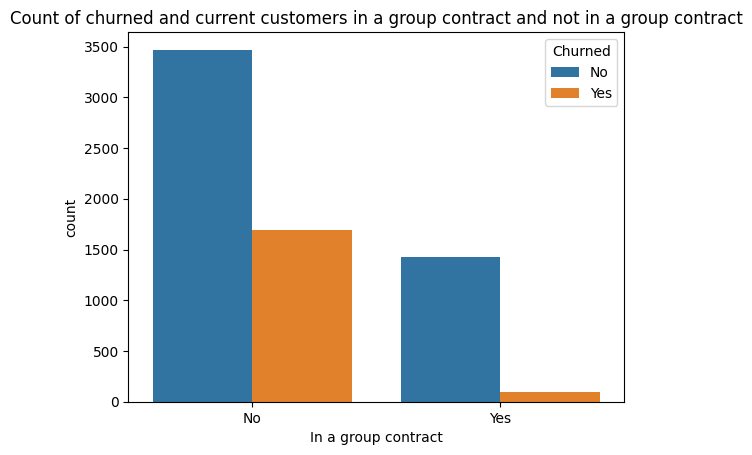

In [36]:
sns.countplot(data=databel_df,
              x='Group',
              hue='Churn Label')

plt.title('Count of churned and current customers in a group contract and not in a group contract')
plt.xlabel('In a group contract')
plt.legend(title='Churned')
plt.show()

### Lets see how long customers that are in a group contract have been with the company.

In [37]:
current_customer_in_group_duration = current_df[current_df['Group'] == 'Yes']['Account Length (in months)']
churned_customer_in_group_duration = churned_df[churned_df['Group'] == 'Yes']['Account Length (in months)']

print(f"Average duration in months of current customers in a group contract: {round(np.mean(current_customer_in_group_duration), 2)}")
print(f"Average duration in months of churned customers in a group contract: {round(np.mean(churned_customer_in_group_duration), 2)}")

Average duration in months of current customers in a group contract: 40.17
Average duration in months of churned customers in a group contract: 12.02


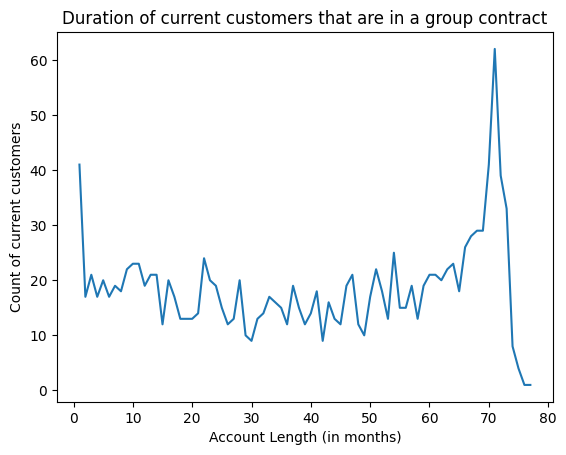

In [38]:
counts = current_df[current_df['Group'] == 'Yes']['Account Length (in months)'].value_counts()
sns.lineplot(x=counts.index, y=counts.values, errorbar=None)
plt.title('Duration of current customers that are in a group contract')
plt.ylabel('Count of current customers')
plt.show()

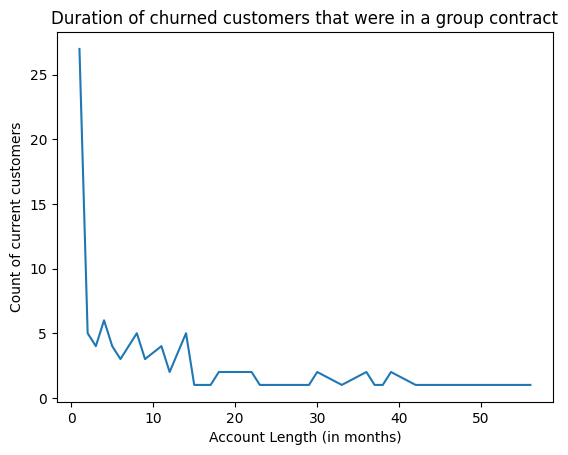

In [39]:
counts = churned_df[churned_df['Group'] == 'Yes']['Account Length (in months)'].value_counts()
sns.lineplot(x=counts.index, y=counts.values, errorbar=None)
plt.title('Duration of churned customers that were in a group contract')
plt.ylabel('Count of current customers')
plt.show()

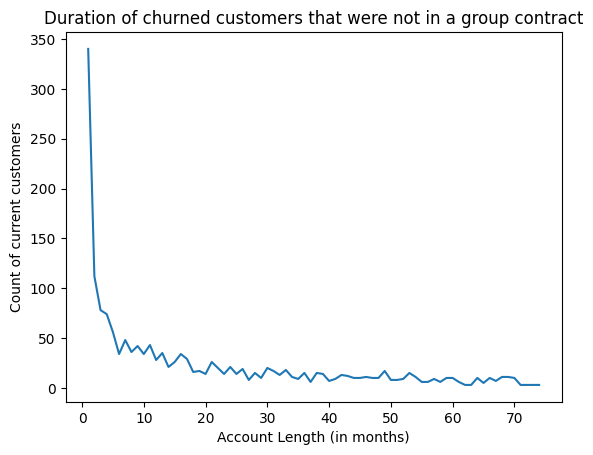

In [40]:
counts = churned_df[churned_df['Group'] == 'No']['Account Length (in months)'].value_counts()
sns.lineplot(x=counts.index, y=counts.values, errorbar=None)
plt.title('Duration of churned customers that were not in a group contract')
plt.ylabel('Count of current customers')
plt.show()

### Lets see how many churned and current customers that were making international calls had an international premium plan.

In [41]:
counts = churned_df[churned_df['Intl Plan'] == 'No']['Intl Active'].value_counts()
print(counts.sort_index())

Intl Active
No     788
Yes    846
Name: count, dtype: int64


In [42]:
percentage = round((counts['Yes'] / np.sum(counts)) * 100, 2)
print(f"Percent of churned customers that made international calls without international plan: {percentage}%")

Percent of churned customers that made international calls without international plan: 51.77%


In [43]:
counts = current_df[current_df['Intl Plan'] == 'No']['Intl Active'].value_counts()
print(counts.sort_index())

Intl Active
No     3151
Yes    1251
Name: count, dtype: int64


In [44]:
percentage = round((counts['Yes'] / np.sum(counts)) * 100, 2)
print(f"Percent of current customers that made international calls without international plan: {percentage}%")

Percent of current customers that made international calls without international plan: 28.42%


### Lets look at the extra charges for international calls for customers with no international premium plan.

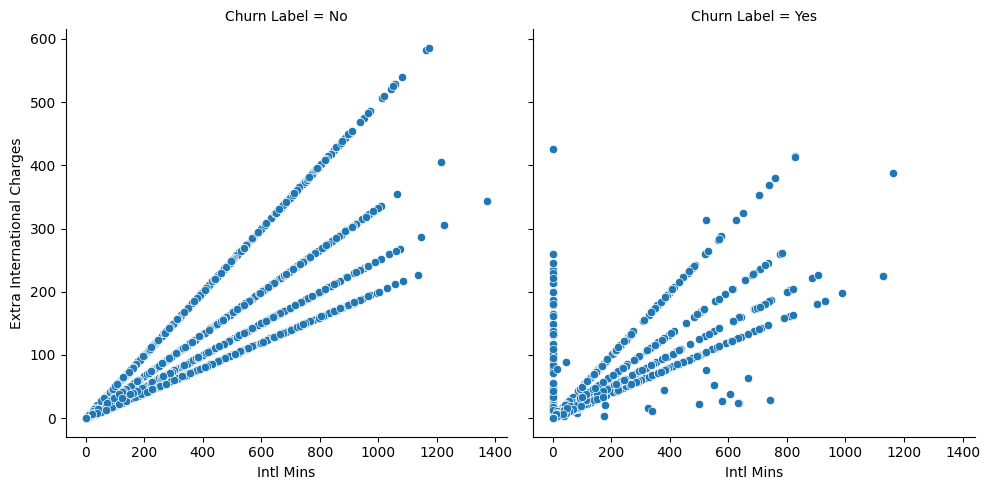

In [45]:
g = sns.relplot(data=databel_df[databel_df['Intl Plan'] == 'No'],
                x='Intl Mins',
                y='Extra International Charges',
                col='Churn Label',
                kind='scatter')

# The left scatter plot shows for current customers, the right scatter plot shows for churned customers.
plt.show()

In [46]:
correlation = round(churned_df['Intl Mins'].corr(churned_df['Extra International Charges']), 2)
print(f"Correlation between Intl Mins and Extra International Charges [Churned Customers]: {correlation}")
correlation = round(current_df['Intl Mins'].corr(current_df['Extra International Charges']), 2)
print(f"Correlation between Intl Mins and Extra International Charges [Current Customers]: {correlation}")

Correlation between Intl Mins and Extra International Charges [Churned Customers]: 0.81
Correlation between Intl Mins and Extra International Charges [Current Customers]: 0.77


### Lets look at data downloads for customers that are not enrolled in an unlimited data plan.

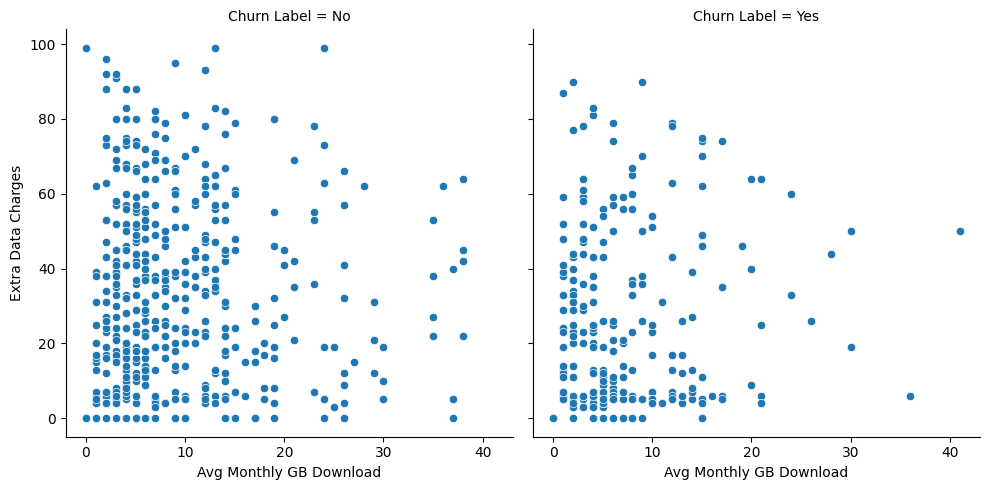

In [47]:
sns.relplot(data=databel_df[databel_df['Unlimited Data Plan'] == 'No'],
            x='Avg Monthly GB Download',
            y='Extra Data Charges',
            col='Churn Label',
            kind='scatter')

plt.show()

In [48]:
correlation = round(churned_df['Avg Monthly GB Download'].corr(churned_df['Extra Data Charges']), 2)
print(f"Correlation between Avg Monthly GB Download and Extra Data Charges [Churned Customers]: {correlation}")
correlation = round(current_df['Avg Monthly GB Download'].corr(current_df['Extra Data Charges']), 2)
print(f"Correlation between Avg Monthly GB Download and Extra Data Charges [Current Customers]: {correlation}")

Correlation between Avg Monthly GB Download and Extra Data Charges [Churned Customers]: 0.03
Correlation between Avg Monthly GB Download and Extra Data Charges [Current Customers]: 0.09


### Now lets analyze the monthly and total charges for customers.

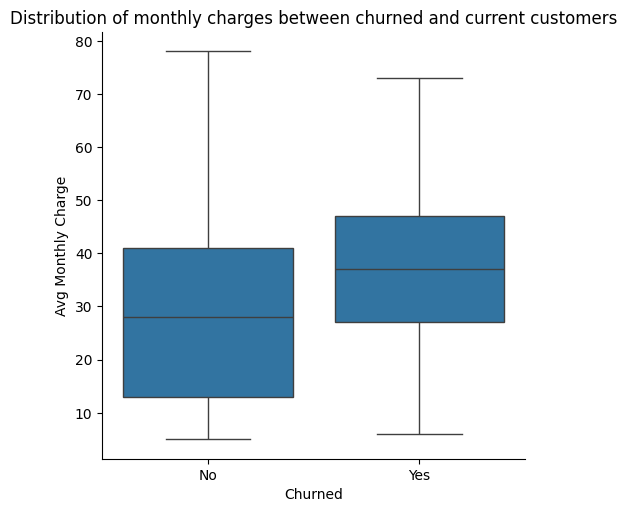

In [49]:
sns.catplot(data=databel_df,
            x='Churn Label',
            y='Monthly Charge',
            kind='box')

plt.title('Distribution of monthly charges between churned and current customers')
plt.xlabel('Churned')
plt.ylabel('Avg Monthly Charge')
plt.show()

In [50]:
print(f"Average monthly charge for churned customers: {round(np.mean(churned_df['Monthly Charge']), 2)}")
print(f"Median  monthly charge for churned customers: {np.median(churned_df['Monthly Charge'])}")
print(f"Average monthly charge for current customers: {round(np.mean(current_df['Monthly Charge']), 2)}")
print(f"Median  monthly charge for current customers: {np.median(current_df['Monthly Charge'])}")

Average monthly charge for churned customers: 36.8
Median  monthly charge for churned customers: 37.0
Average monthly charge for current customers: 28.91
Median  monthly charge for current customers: 28.0


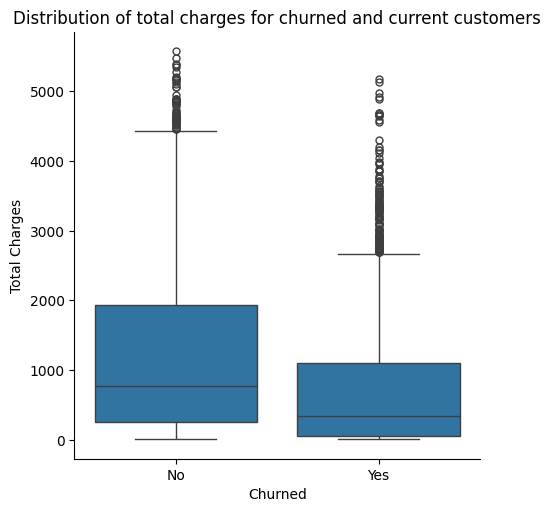

In [51]:
sns.catplot(data=databel_df,
            x='Churn Label',
            y='Total Charges',
            kind='box')

plt.title('Distribution of total charges for churned and current customers')
plt.xlabel('Churned')
plt.show()

In [52]:
print(f"Average total charge for churned customers: {round(np.mean(churned_df['Total Charges']), 2)}")
print(f"Median  total charge for churned customers: {np.median(churned_df['Total Charges'])}")
print(f"Average total charge for current customers: {round(np.mean(current_df['Total Charges']), 2)}")
print(f"Median  total charge for current customers: {np.median(current_df['Total Charges'])}")

Average total charge for churned customers: 761.42
Median  total charge for churned customers: 340.0
Average total charge for current customers: 1202.12
Median  total charge for current customers: 778.0


## Categories and Reasons for customer churn

### Lets take a look at the reasons customers have stated for churning.

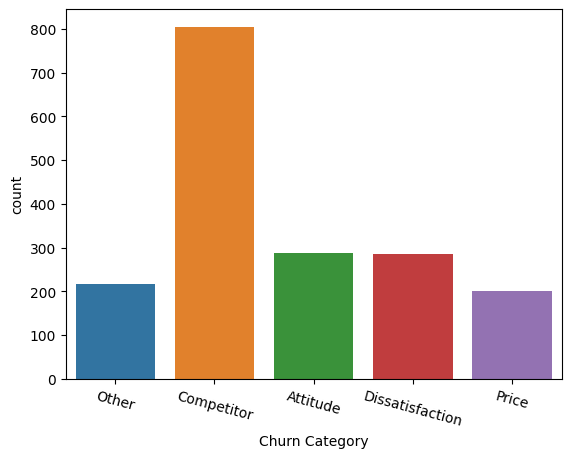

In [53]:
sns.countplot(x='Churn Category',
              data=churned_df,
              hue='Churn Category')

plt.xticks(rotation=-15)
plt.show()

### It looks like of the churn categories, *Competitor* is the number one category by far.
### Lets take a look at the reasons within this category.

In [54]:
churn_category_reason_groupby = databel_df.groupby(['Churn Category', 'Churn Reason'])[['Churn Category', 'Churn Reason']].value_counts()
churn_category_reason_groupby['Competitor']

Churn Reason
Competitor had better devices                297
Competitor made better offer                 303
Competitor offered higher download speeds     95
Competitor offered more data                 110
Name: count, dtype: int64

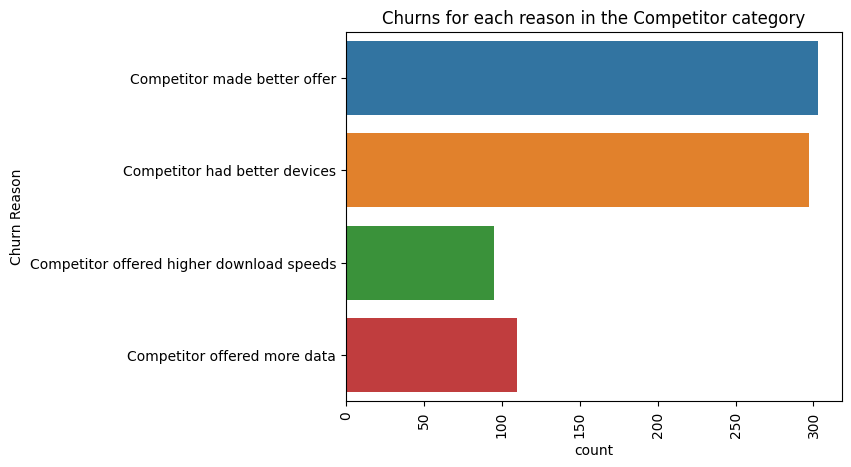

In [55]:
sns.countplot(y='Churn Reason',
              data=churned_df[churned_df['Churn Category'] == 'Competitor'],
              hue='Churn Reason')
plt.xticks(rotation=90)
plt.title('Churns for each reason in the Competitor category')
plt.show()

# Summary
* The overall churn rate is 26.86%.
* Demographics of churned customers:
    * The age group that is over 30 but under 65 has the most churns.
    * An equal number of male and female customers have churned.
    * Among the states, California has the highes churn rate. California also has had the lowest count of customers among all the states.
* Contracts, Plans, Local and International calling:
    * Monthly contracts have the highest rate of churn.
    * Churns occur most frequently durning the first month of business(20.43%).
    * Among current customers, 62.54% of them are enrolled in a yearly contract while only 12.08% of customers that churned were enrolled in a yearly contract.
    * Customers that are in a group contract seem to be more likely to stay with the company for longer periods of time. Among churned customers, 5.51% were enrolled in a group contract, while 29.07% of current customers are enrolled in a group contract.
    * 52% of customers that churned made international calls while not having international premium plans. Only 28% of current customers made international calls while not having international premium plans.
    * There is a strong positive correlation between international call charges and length of time in minutes of international calls for customers that are not enrolled in an international premium plan.
        * This applies to both churned and current customers.
    * There is virtually no correlation between extra data charges and the average monthly data download of customers that are not enrolled in an unlimited data plan.
        * This applies to both churned and current customers.
    * Customers that churned had on average a higher monthly bill than customers that have not churned.
* Categories and Reasons for customer churn:
    * Competitors are the number one category of reasons that customers have churned.
    * Within that category, the number one reason is *competitor made better offer*, though *competitor had better devices* came in close second.
    